## Introduction

In [1]:
#Pandas and numpy for data manipulation

import numpy as np
import pandas as pd

# Matplot lib and seaborn for visualizations

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

import seaborn as sns 

# Standard machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Scikit-learn utilities

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read in the csv
datafile = 'student-mat.csv'
data = pd.read_csv(
    filepath_or_buffer=datafile,
    delimiter=';')

# select features we will be using
features = ['G3', 'school', 'sex', 'age', 'Pstatus', \
            'Medu', 'Fedu', 'studytime', 'failures','schoolsup', \
            'activities', 'health', 'absences', \
            'higher', 'internet','freetime']

# slice df with just the features we want to analyze
df = data[features]

# preview data
df.head()

,G3,school,sex,age,Pstatus,Medu,Fedu,studytime,failures,schoolsup,activities,health,absences,higher,internet,freetime
0,6,GP,F,18,A,4,4,2,0,yes,no,3,6,yes,no,3
1,6,GP,F,17,T,1,1,2,0,no,no,3,4,yes,yes,3
2,10,GP,F,15,T,1,1,2,3,yes,no,3,10,yes,yes,3
3,15,GP,F,15,T,4,2,3,0,no,yes,5,2,yes,yes,2
4,10,GP,F,16,T,3,3,2,0,no,no,5,4,yes,no,3


In [3]:
# Check to see if we have the correct number of features
# Check to see how many students we have

print('Features :', df.columns)
print('')
print('Total number of students in our dataset is N : %0.f' % df.shape[0])

Features : Index(['G3', 'school', 'sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'studytime',
       'failures', 'schoolsup', 'activities', 'health', 'absences', 'higher',
       'internet', 'freetime'],
      dtype='object')

Total number of students in our dataset is N : 395


In [4]:
# Rename our G3 (final grade) 
df.rename(columns= {'G3':'Success'},  inplace = True)
df['Success'] = df['Success'].apply(lambda x: 1 if x > 10 else 0)

# male is 1, female is 0
df.sex[df.sex == 'M'] = 1
df.sex[df.sex == 'F'] = 0

df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['school'] = df['school'].map({'GP': 1, 'MS': 0})


df.head()

,Success,school,sex,age,Pstatus,Medu,Fedu,studytime,failures,schoolsup,activities,health,absences,higher,internet,freetime
0,0,1,0,18,0,4,4,2,0,1,0,3,6,1,0,3
1,0,1,0,17,1,1,1,2,0,0,0,3,4,1,1,3
2,0,1,0,15,1,1,1,2,3,1,0,3,10,1,1,3
3,1,1,0,15,1,4,2,3,0,0,1,5,2,1,1,2
4,0,1,0,16,1,3,3,2,0,0,0,5,4,1,0,3


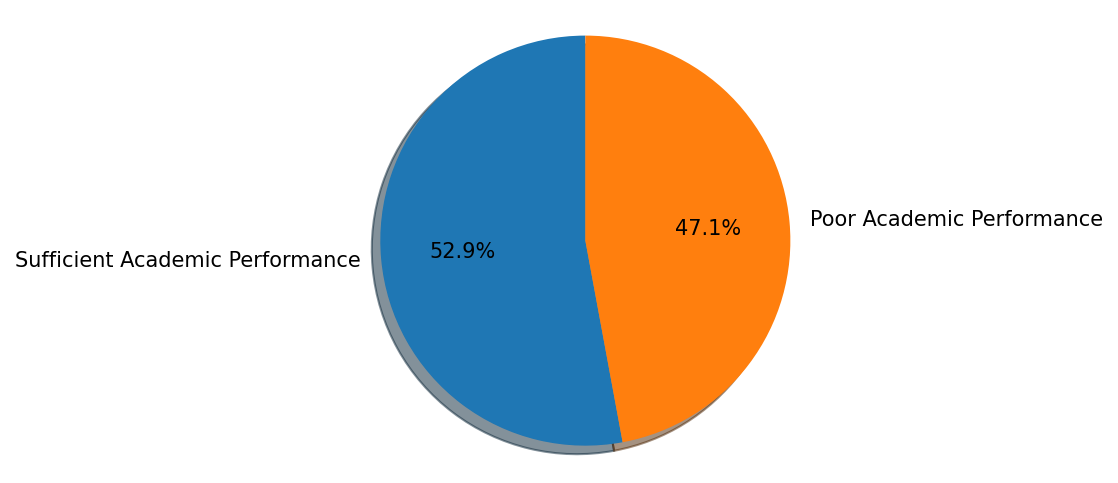

In [5]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Sufficient Academic Performance', 'Poor Academic Performance']
sizes = [len(df[df['Success'] == 1] ), len(df[df['Success'] == 0] )]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

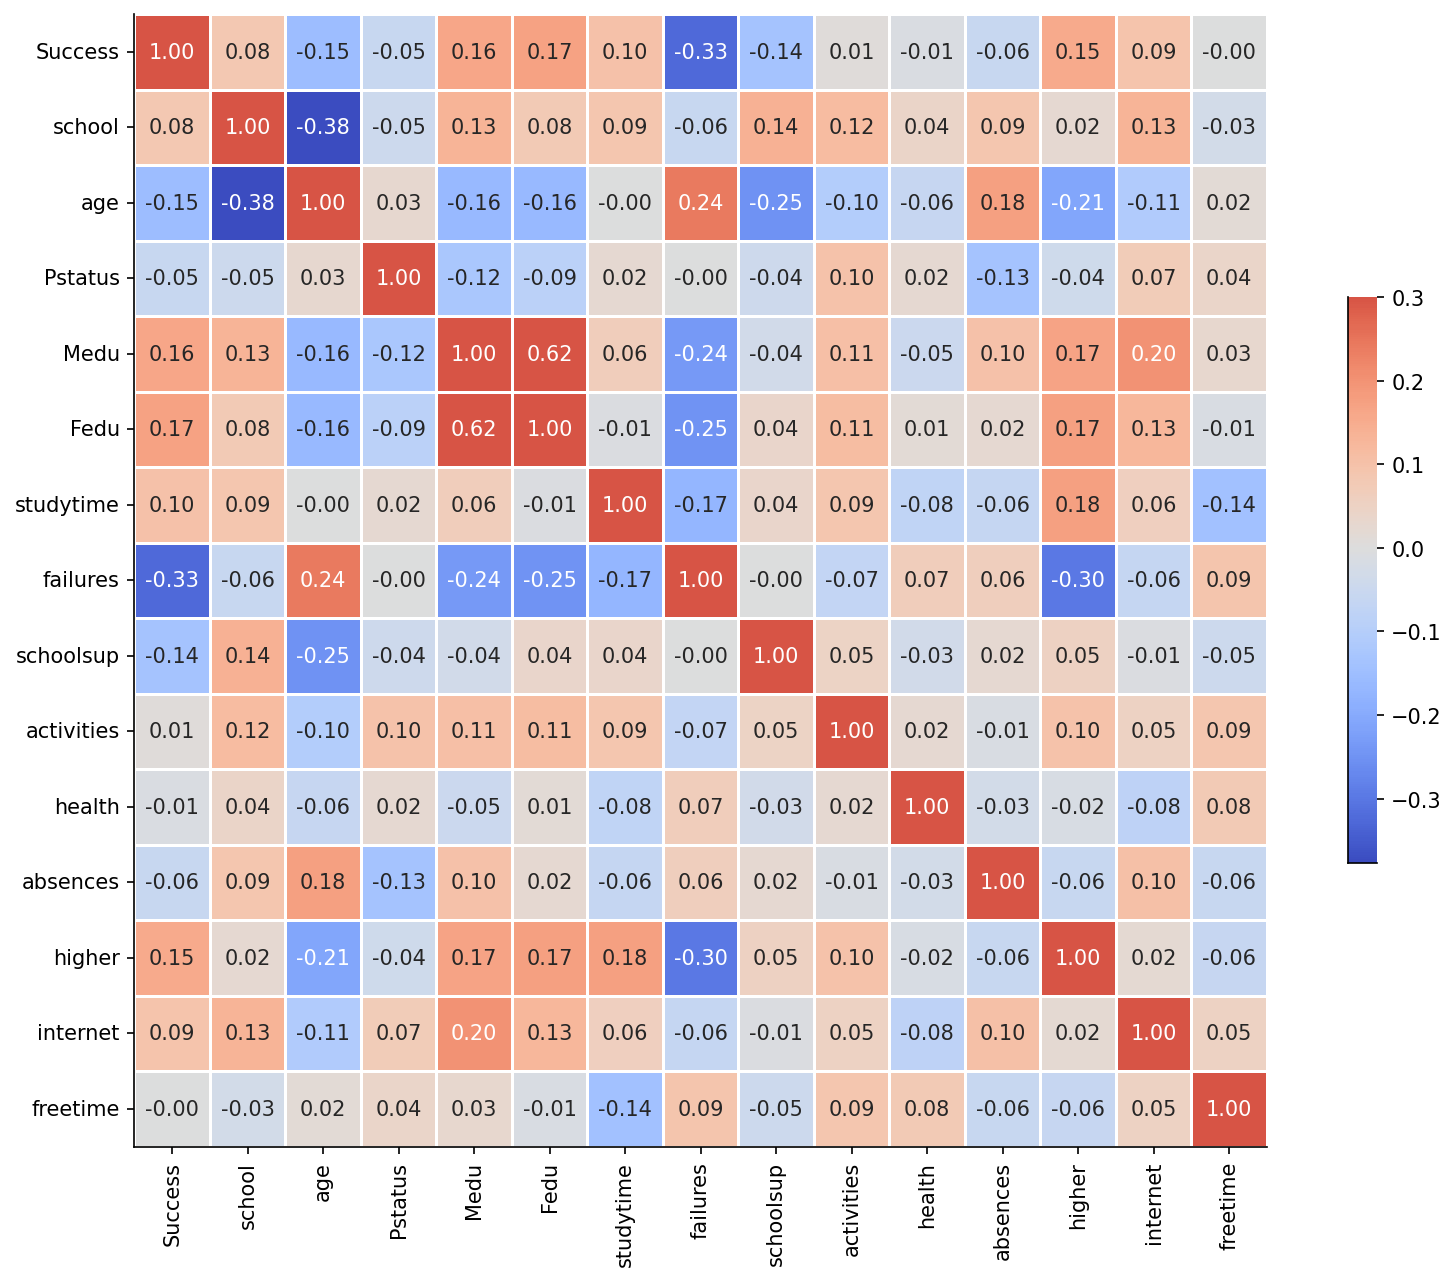

In [6]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

Text(0, 0.5, 'Second principle component')

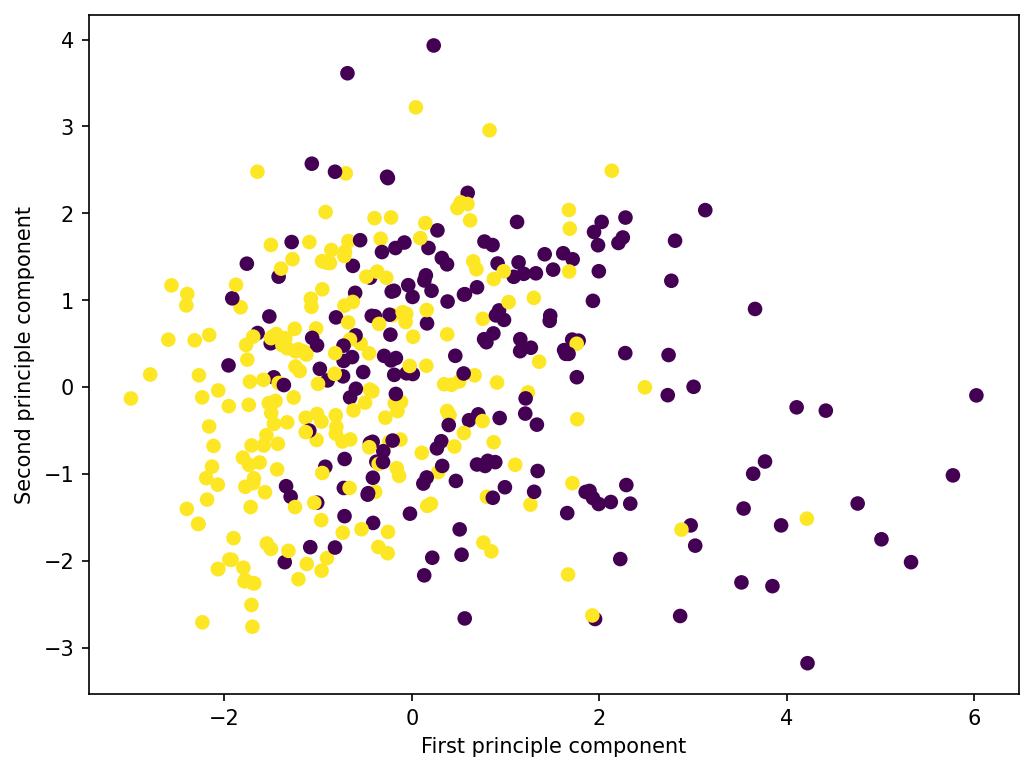

In [7]:
# PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df)

scaled_data=scaler.transform(df)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Success'])

plt.xlabel('First principle component')
plt.ylabel('Second principle component')

### Training and Testing

In [8]:
use_features = ['school', 'sex', 'age', 'Pstatus', \
            'Medu', 'Fedu', 'studytime', 'failures','schoolsup', \
            'activities', 'health', 'absences', \
            'higher', 'internet','freetime']
target = ["Success"]

X = df[use_features]
y = df[target]

# Split into training and testing sets using 30% of our observations for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Scale the data 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(X_test.shape)



(276, 15)
(119, 15)


In [9]:
y_train['Success'].value_counts()

1    156
0    120
Name: Success, dtype: int64

#### Baseline Model

In [10]:
# Calculate the accuracy and classification report of our model
def calc_metrics(y_true, y_pred):
    cr = classification_report(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    print('The classification report : ')
    print('')
    print(cr)
    print('')
    print('Accuracy of Model: {:.2f}%'.format(100 * ac))

In [11]:
# Make naive baseline and evaluate metrics
baseline_pred = [1 for _ in range(len(y_test))]
calc_metrics(y_test, baseline_pred)

The classification report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.45      1.00      0.62        53

    accuracy                           0.45       119
   macro avg       0.22      0.50      0.31       119
weighted avg       0.20      0.45      0.27       119


Accuracy of Model: 44.54%


In [12]:
# Visualizes a confusion matrix as a plot
def plot_confusion_matrix(cm):

    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    
    # we use a heatmap from the seaborn plot.

    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='g')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(['Failing Students', 'Suceeding Students'],
                       fontsize='x-small', rotation=30)
    ax.set_yticklabels(['Failing Students', 'Suceeding Students'],
                       fontsize='x-small', va="center")
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')

Confusion matrix
[[ 0 66]
 [ 0 53]]


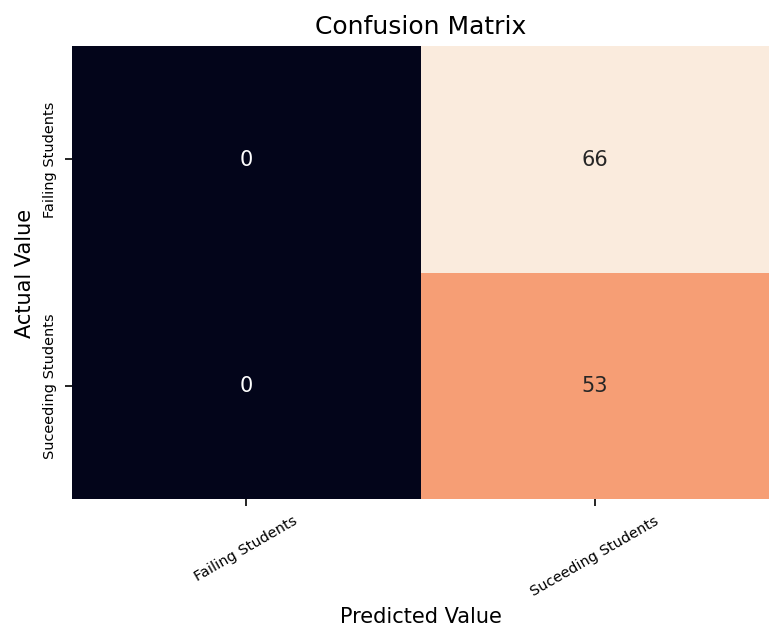

In [13]:
cm = confusion_matrix(y_test, baseline_pred)
plot_confusion_matrix(cm)

### Standard ML Methods

#### Logistic Regression

In [14]:
# Make logistic regression model and fit

lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions and evaluate

lr_pred = lr.predict(X_test)
calc_metrics(y_test, lr_pred)

The classification report : 

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        66
           1       0.57      0.89      0.69        53

    accuracy                           0.65       119
   macro avg       0.70      0.67      0.64       119
weighted avg       0.71      0.65      0.63       119


Accuracy of Model: 64.71%


In [15]:
# Determine The roc curve and the auc and display

def calc_roc(y_test, prob_predict,model_name):
    
    lr_predict_probabilities = prob_predict

    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
    lr_roc_auc = auc(lr_fpr, lr_tpr)

    plt.figure()
    plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='%s (area = %0.2f)' % (model_name,lr_roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic Curve Curve, AUC = %.4f' % lr_roc_auc)
    plt.legend(loc="lower right")
    plt.show()

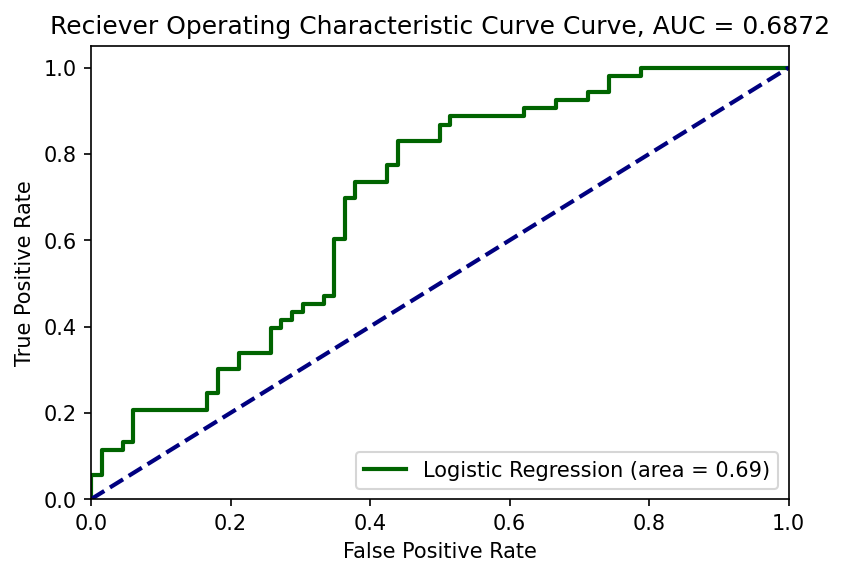

In [16]:
# ROC for Logistic Regression
lr_pred_proba = lr.predict_proba(X_test)[:, 1]
calc_roc(y_test,lr_pred_proba,'Logistic Regression')

### Random Forest

In [17]:
# Create and fit the random forest
regressor = RandomForestClassifier(n_estimators=40, random_state=0)
regressor.fit(X_train, y_train.values.ravel())


# Evaluate predictions
y_pred = regressor.predict(X_test)
calc_metrics(y_test,y_pred)

The classification report : 

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        66
           1       0.57      0.77      0.66        53

    accuracy                           0.64       119
   macro avg       0.66      0.65      0.64       119
weighted avg       0.67      0.64      0.64       119


Accuracy of Model: 63.87%


Confusion matrix
[[35 31]
 [12 41]]


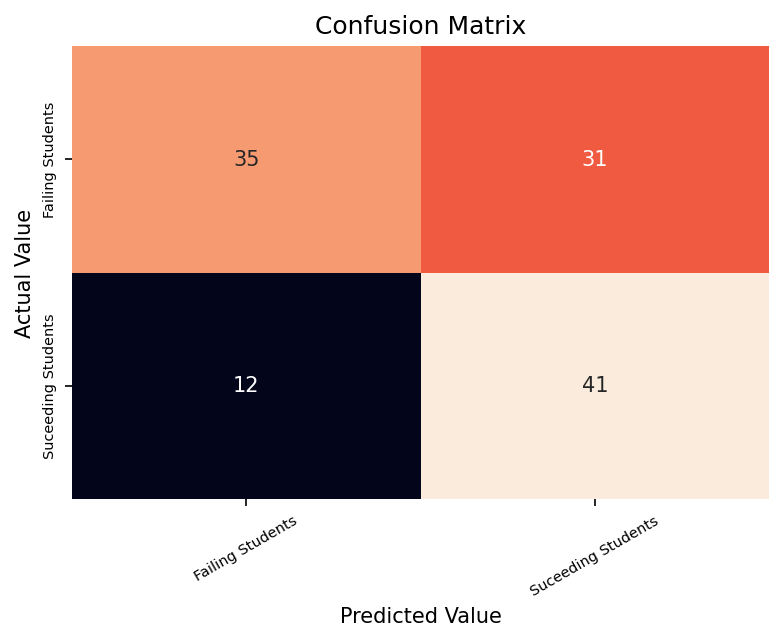

In [18]:
# Confusion Matrix For Random Forest
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

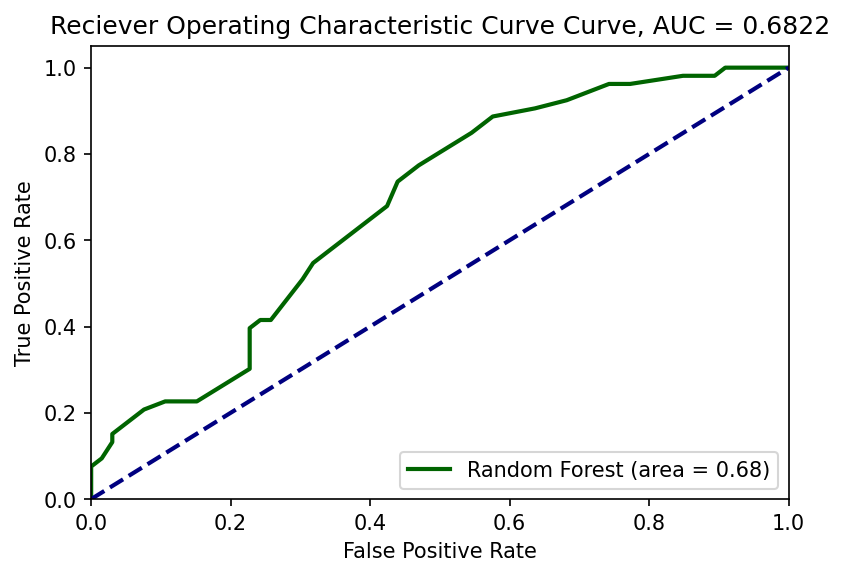

In [19]:
# ROC for Random Forest
rf_predict = regressor.predict_proba(X_test)[:,1]
calc_roc(y_test,rf_predict,'Random Forest')

#### Grid Search Random Forest 

In [20]:
# We will use GridSearch to find the best parameters for this model

gridsearch_forest = RandomForestClassifier()

params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5,8,15],
    "min_samples_leaf" : [1, 2, 4]
}

clf = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
clf.fit(X,y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 300, 500]})

In [21]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 300}

In [22]:
# Create and fit the random forest
regressor = RandomForestClassifier(n_estimators = 100, max_depth = 5, 
                                   min_samples_leaf = 1, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())

# Evaluate predictions
y_pred = regressor.predict(X_test)
calc_metrics(y_test,y_pred)

The classification report : 

              precision    recall  f1-score   support

           0       0.85      0.44      0.58        66
           1       0.56      0.91      0.70        53

    accuracy                           0.65       119
   macro avg       0.71      0.67      0.64       119
weighted avg       0.72      0.65      0.63       119


Accuracy of Model: 64.71%


Confusion matrix
[[29 37]
 [ 5 48]]


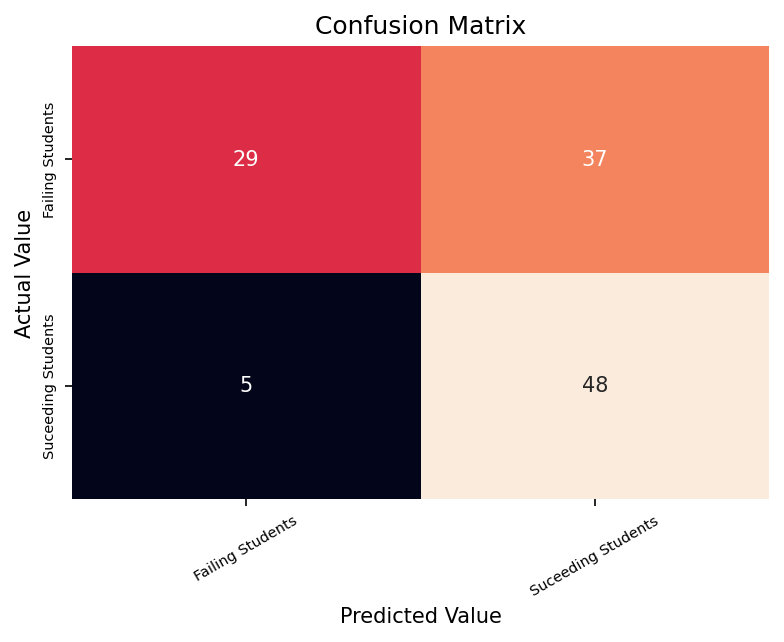

In [23]:
# Confusion Matrix For Random Forest
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

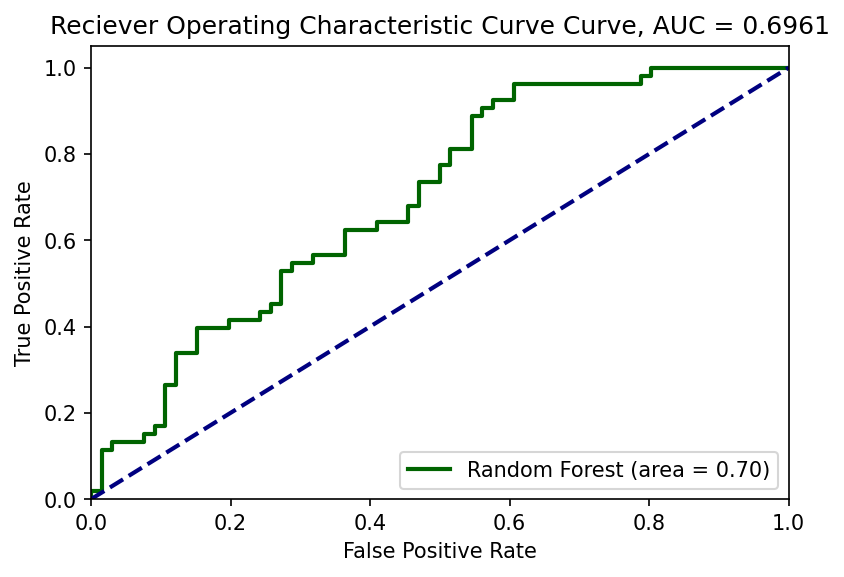

In [24]:
# ROC for Random Forest
rf_predict = regressor.predict_proba(X_test)[:,1]
calc_roc(y_test,rf_predict,'Random Forest')

### Support Vector Machine

In [25]:
# Create and fit SVM
clf = svm.SVC(class_weight = 'balanced',
              probability = True)
clf.fit(X_train, y_train.values.ravel())


# Evaluate predictions
y_pred = clf.predict(X_test)
calc_metrics(y_test,y_pred)

The classification report : 

              precision    recall  f1-score   support

           0       0.76      0.56      0.64        66
           1       0.59      0.77      0.67        53

    accuracy                           0.66       119
   macro avg       0.67      0.67      0.66       119
weighted avg       0.68      0.66      0.65       119


Accuracy of Model: 65.55%


Confusion matrix
[[37 29]
 [12 41]]


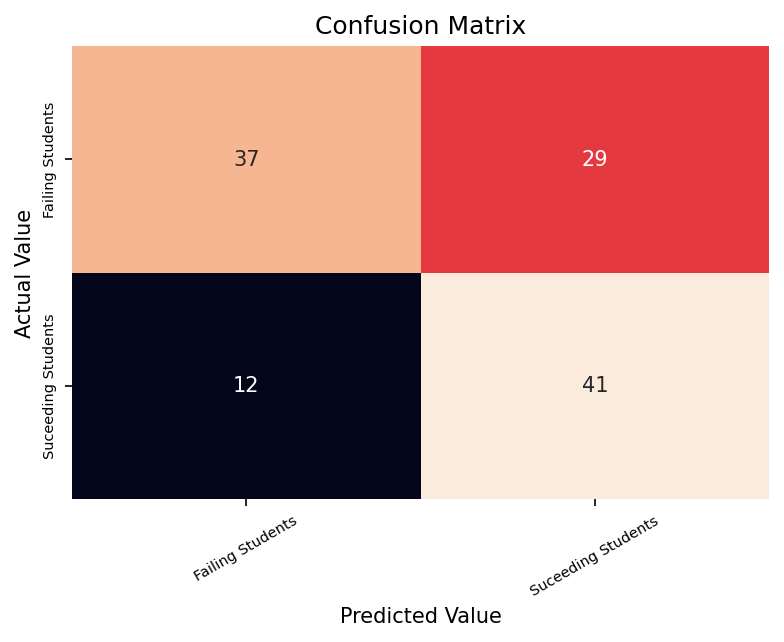

In [26]:
# Confusion Matrix For Support Vector Machine
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

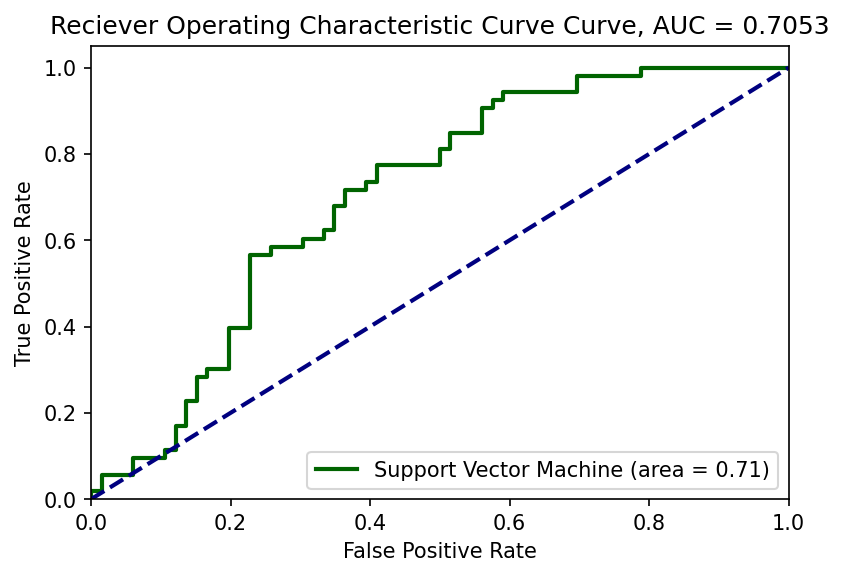

In [27]:
# ROC for SVM
svm_predicta = clf.predict_proba(X_test)[:,1]
calc_roc(y_test,svm_predicta,'Support Vector Machine')

### Conclusions 

Luckily, all of these models perform better than the base model! 

Base Model:
AUC 44.45% 
F1 0.27

Logistic Regression:
AUC 64.71%
F1 0.63

Random Forest:
AUC 63.87%
F1 0.64

Grid Search RF:
AUC 64.71%
F1 0.63

SVM:
AUC 65.55%
F1 0.65 

### Next Steps ?

Which variables affect the Success most?

Can we add back more variables from the original dataset?

Can we more carefully select a model based on its pros/cons rather than simply throwing multiple models at it?

Though this contradicts the last point, can we use Neural Networks to classify Success?

Can we reccomend things to change for students who are performing poorly?